In [60]:
import ast
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

train = pd.read_csv('source/train.csv')
test = pd.read_csv('source/test.csv')
len(train), len(test)

(250, 50)

Количество изображений с досками и без. Можно считать что почти на всех изображениях есть доска.

In [26]:
train['labels'].map(lambda x: len([x for x in 
                                   (x for x in ast.literal_eval(x)) 
                                   if x['class'] == 'whiteboard'])).value_counts()

1    247
0      3
Name: labels, dtype: int64

Как много досок разного цвета. Почти все доски белые.

In [34]:
def whiteboard_color(label_str):
    for x in ast.literal_eval(label_str):
        if x['class'] == 'whiteboard':
            return x.get('id', 'white')
    return None
train['labels'].map(whiteboard_color).value_counts()

white    238
black      9
Name: labels, dtype: int64

Как много изображений где только доски. Их много (почти 60). Получается что изображений на которых можно тренироваться находить текст/изображения меньше 200. 

In [59]:
train['labels'].map(lambda x: len([x for x in 
                                   (x for x in ast.literal_eval(x)) 
                                   if x['class'] != 'whiteboard']) == 0).value_counts()

False    191
True      59
Name: labels, dtype: int64

Как много досок с текстом. Подавляющее большинство из оставшихся 200.

In [50]:
train['labels'].map(lambda x: len([x for x in 
                                   (x for x in ast.literal_eval(x)) 
                                   if x['class'] == 'text']) > 0 ).value_counts()

True     188
False     62
Name: labels, dtype: int64

Как много досок с фигурами. Много меньше чем досок только с текстом.

In [53]:
train['labels'].map(lambda x: len([x for x in 
                                   (x for x in ast.literal_eval(x)) 
                                   if x['class'] == 'figure']) > 0).value_counts()

True     132
False    118
Name: labels, dtype: int64

Как много досок одновременно и с текстом и фигурами. Почти все доски с фигурами содержат также и текст.

In [55]:
train['labels'].map(lambda x: len([x for x in 
                                   (x for x in ast.literal_eval(x)) 
                                   if x['class'] == 'figure']) > 0 and len([x for x in 
                                   (x for x in ast.literal_eval(x)) 
                                   if x['class'] == 'text']) > 0).value_counts()

True     129
False    121
Name: labels, dtype: int64

Распределение фигур по изображениям. Видно что чаще всего на доске одна фигура.

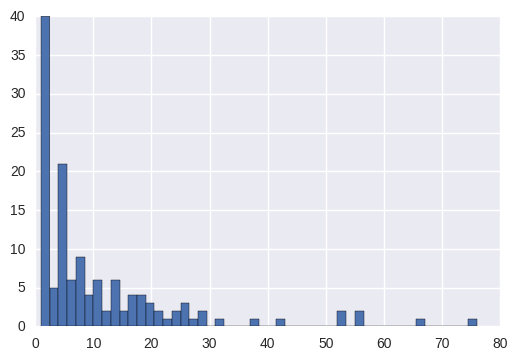

In [89]:
train['labels'].map(lambda x: len([x for x in 
                                   (x for x in ast.literal_eval(x)) 
                                   if x['class'] == 'figure']))[lambda x: x > 0].hist(bins=50)

Распределение текста по изображениям. Чаще всего на доске один блок текста.

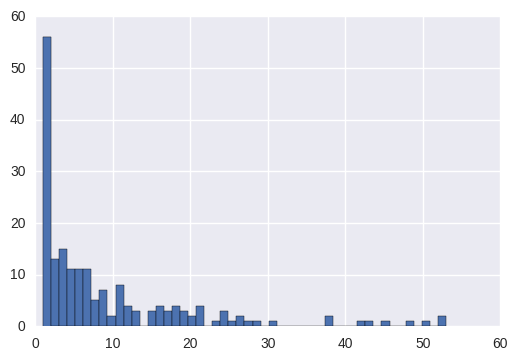

In [86]:
train['labels'].map(lambda x: len([x for x in 
                                   (x for x in ast.literal_eval(x)) 
                                   if x['class'] == 'text']))[lambda x: x > 0].hist(bins=50)